In [1]:
# ==============================================
# 1. Import Library
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
import joblib

In [2]:
# ==============================================
# 2. Load Dataset
# ==============================================
df = pd.read_csv("diabetes.csv")

print("=== 5 Baris Pertama Dataset ===")
display(df.head())

print("\n=== Informasi Dataset ===")
print(df.info())

print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())

=== 5 Baris Pertama Dataset ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

=== Jumlah Missing Values ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                        

In [3]:
# ==============================================
# 3. Preprocessing Data
# ==============================================
cols_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_replace] = df[cols_replace].replace(0, np.nan)
df[cols_replace] = df[cols_replace].fillna(df[cols_replace].mean())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nJumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 614
Jumlah data uji: 154


In [4]:
# ==============================================
# 4. Pembangunan Model Random Forest
# ==============================================
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [5]:
# ==============================================
# 5. Hasil Training & Evaluasi Model
# ==============================================
accuracy = accuracy_score(y_test, y_pred)
print("\n=== HASIL TRAINING MODEL ===")
print("Akurasi Model Random Forest: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== HASIL TRAINING MODEL ===
Akurasi Model Random Forest: 75.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



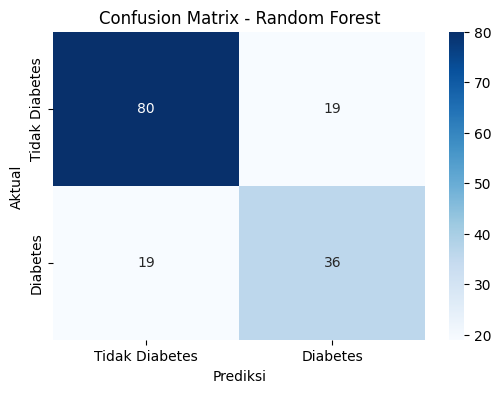

In [6]:
# ==============================================
# 6. Confusion Matrix
# ==============================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Diabetes', 'Diabetes'],
            yticklabels=['Tidak Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

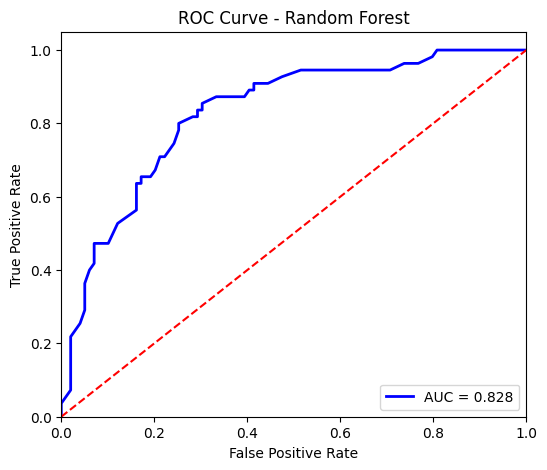


Nilai AUC: 0.828


In [7]:
# ==============================================
# 7. ROC Curve dan AUC
# ==============================================
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print("\nNilai AUC:", round(roc_auc, 3))

In [8]:
# ==============================================
# 8. Simpan Model
# ==============================================
joblib.dump(rf_model, "model_diabetes_rf.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")

print("\nModel berhasil disimpan sebagai 'model_diabetes_rf.pkl'")


Model berhasil disimpan sebagai 'model_diabetes_rf.pkl'
